# MINOR ASSIGNMENT-1: OBJECT-ORIENTED PROGRAMMING (OOP)

<b>Question 1:</b>  
What is the significance of classes in Python programming, and how do they contribute to object oriented programming?


<b>Solution:</b>
Classes in Python provide a blueprint for creating objects. They encapsulate data (attributes) and behavior (methods), promoting code reuse, modularity, and organization. Object-oriented programming (OOP) enables concepts like encapsulation, inheritance, and polymorphism, making code more maintainable and scalable.

<b>Question 2:</b>  
Create a custom Python class for managing a bank account with basic functionalities like deposit and
withdrawal?

In [1]:
class BankAccount:
    def __init__(self, balance=0):
        self.balance = balance

    def deposit(self, amount):
        self.balance += amount

    def withdraw(self, amount):
        if amount > self.balance:
            return 'Insufficient funds'
        self.balance -= amount

    def get_balance(self):
        return self.balance

acc = BankAccount(1000)
acc.deposit(500)
acc.withdraw(200)
print("Output:")
print(acc.get_balance())

Output:
1300


<b>Question 3:</b>  
Create a Book class that contains multiple Chapters, where each Chapter has a title and page count. Write code to initialize a Book object with three chapters and display the total page count of the book.

In [4]:
class Chapter:
    def __init__(self, title, pages):
        self.title = title
        self.pages = pages

class Book:
    def __init__(self, title, chapters):
        self.title = title
        self.chapters = chapters

    def totPages(self):
        return sum(ch.pages for ch in self.chapters)

chapters = [Chapter('Intro', 10), Chapter('Functions', 20), Chapter('OOPs', 15)]
book = Book('Python Book', chapters)

print("Output:")
print("Total no. of pages in the book \"", book.title, "\" is: ", book.totPages())

Output:
Total no. of pages in the book " Python Book " is:  45


<b>Question 4:</b>  
How does Python enforce access control to class attributes, and what is the difference between public, protected, and private attributes?

<b>Answer:</b><br>
* Public attributes (e.g., self.name) can be accessed from anywhere.
* Protected attributes (e.g., self._name) should not be accessed outside the class but can be.
* Private attributes (e.g., self.__name) are name-mangled to _ClassName__name and should not be accessed directly.

<b>Question 5:</b>  
Write a Python program using a Time class to input a given time in 24-hour format and convert it to a 12-hour format with AM/PM. The program should also validate time strings to ensure they are in the correct HH:MM:SS format. Implement a method to check if the time is valid and return an appropriate message.

In [10]:
import re

class Time:
    def __init__(self, time_str):
        if self.is_valid(time_str):
            self.hours, self.minutes, self.seconds = map(int, time_str.split(":"))
        else:
            raise ValueError("Invalid time format")

    @staticmethod
    def is_valid(time_str):
        return bool(re.fullmatch(r"\d{2}:\d{2}:\d{2}", time_str))

    def convert(self):
        suffix = "AM" if self.hours < 12 else "PM"
        hours = self.hours % 12 or 12
        return f"{hours}:{self.minutes:02d}:{self.seconds:02d} {suffix}"

t = Time("23:15:45")
print("Output:")
print("Time in HH:MM:SS format = ", t.convert())

Output:
Time in HH:MM:SS format =  11:15:45 PM


<b>Question 6:</b>  
Write a Python program that uses private attributes for creating a BankAccount class. Implement methods to deposit, withdraw, and display the balance, ensuring direct access to the balance attribute is restricted. Explain why using private attributes can help improve data security and prevent accidental modifications.

In [12]:
class BankAccount:
    def __init__(self, balance=0):
        self.__balance = balance

    def deposit(self, amount):
        self.__balance += amount

    def withdraw(self, amount):
        if amount > self.__balance:
            return "Insufficient funds"
        self.__balance -= amount

    def get_balance(self):
        return self.__balance

acc = BankAccount(1000)
print("Output:")
print("Balance = ", acc.get_balance())

Output:
Balance =  1000


**Why Use Private Attributes?**  
* Data Security: Prevents unauthorized access or modification of sensitive data (e.g., account balance).
* Prevent Accidental Modifications: Ensures that the balance can only be modified through controlled methods (deposit and withdraw),
* reducing the risk of bugs or unintended changes.
* Encapsulation: Hides the internal implementation details, allowing changes to the class internals without affecting external code.

<b>Question 7:</b>  
Write a Python program to simulate a card game using object-oriented principles. The program should include a Card class to represent individual playing cards, a Deck class to represent a deck of cards, and a Player class to represent players receiving cards. Implement a shuffle method in the Deck class to shuffle the cards and a deal method to distribute cards to players. Display each player’s hand after dealing.

In [19]:
import random

class Card:
    def __init__(self, s, r):
        self.suit, self.rank = s, r
        
    def __str__(self):
        return f"{self.rank} of {self.suit}"
        
class Deck:
    def __init__(self):
        self.cards = []
        suits = ["Hearts", "Diamonds", "Clubs", "Spades"]
        ranks = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "Jack", "Queen", "King", "Ace"]
        for s in suits:
            for r in ranks:
                self.cards.append(Card(s, r))
                
    def shuffle(self):
        random.shuffle(self.cards)
        
    def deal(self, p_count, c_count):
        hands = [[] for _ in range(p_count)]
        for _ in range(c_count):
            for j in range(p_count):
                if self.cards:
                    hands[j].append(self.cards.pop())
        return hands
        
class Player:
    def __init__(self, n):
        self.name, self.hand = n, []
        
    def receive(self, c):
        self.hand.extend(c)
        
    def show(self):
        print(f"{self.name}'s hand: {', '.join(str(card) for card in self.hand)}")

print("Output:")
deck = Deck()
deck.shuffle()
players = [Player("Jagadeeswar"), Player("Arman"), Player("Subham")]
hands = deck.deal(len(players), 5)
for p, h in zip(players, hands):
 p.receive(h)
 p.show()

Output:
Jagadeeswar's hand: 9 of Hearts, 10 of Diamonds, 5 of Diamonds, 10 of Hearts, 3 of Clubs
Arman's hand: 4 of Hearts, 8 of Diamonds, 6 of Diamonds, Jack of Spades, Queen of Spades
Subham's hand: Queen of Diamonds, 6 of Clubs, Queen of Clubs, 9 of Spades, Ace of Clubs


<b>Question 8:</b>  
Write a Python program that defines a base class Vehicle with attributes make and model, and a method display info(). Create a subclass Car that inherits from Vehicle and adds an additional attribute num doors. Instantiate both Vehicle and Car objects, call their display info() methods, and explain how the subclass inherits and extends the functionality of the base class.

In [25]:
class Vehicle:
    def __init__(self, make, model):
        self.make = make
        self.model = model

    def display(self):
        print(f"Make: {self.make}, Model: {self.model}")

class Car(Vehicle):
    def __init__(self, make, model, doors):
        super().__init__(make, model)
        self.doors = doors

    def display(self):
        super().display()
        print(f"Doors: {self.doors}")

print("Output:")
v = Vehicle("Ford", "Mustang")
v.display()
c = Car("Toyota", "Corolla", 4)
c.display()

Output:
Make: Ford, Model: Mustang
Make: Toyota, Model: Corolla
Doors: 4


Explanation:  
> Inheritance: Car inherits make, model, and show() from Vehicle  
> Method Extension: Car overrides show() to include doors while callingn super().show()  
> Encapsulation: Vehicle holds common attributes, while Car adds extra functionality   y.

<b>Question 9:</b>  
Write a Python program demonstrating polymorphism by creating a base class Shape with a method area(), and two subclasses Circle and Rectangle that override the area() method. Instantiate objects of both subclasses and call the area() method. Explain how polymorphism simplifies working with different shapes in an inheritance hierarchy.

In [48]:
class Shape:
    def area(self):
        pass

class Circle(Shape):
    def __init__(self, radius):
        self.radius = radius

    def area(self):
        return 3.14 * self.radius**2

class Rectangle(Shape):
    def __init__(self, width, height):
        self.width = width
        self.height = height

    def area(self):
        return self.width * self.height

shapes = [Circle(5), Rectangle(4, 6)]
print("Output:")
for shape in shapes:
    print("Area = ", shape.area())

Output:
Area =  78.5
Area =  24


Explanation:
* Polymorphism: The area() method is overridden in both Circle and Rectangle.  
* Dynamic Method Resolution: Calling area() on Shape objects invokes the correct subclass method.  
* Code Reusability: Allows handling different shapes uniformly in loops or functions.  

<b>Question 10:</b>  
Implement the CommissionEmployee class with __init__ , earnings, and __repr__ methods. Include properties for personal details and sales data. Create a test script to instantiate the object, display earnings, modify sales data, and handle data validation errors for negative values.

In [61]:
class CommissionEmployee:
    def __init__(self, n, i, s, c):
        self.name = n
        self.id = i
        self._sales = s
        self.commission_rate = c
        
    @property
    def sales(self):
        return self._sales
        
    @sales.setter
    def sales(self, v):
        self._sales = max(0, v)
        
    def earnings(self):
        return self._sales * self.commission_rate
        
    def __repr__(self):
        return f"CommissionEmployee(name={self.name}, id={self.id}, sales={self._sales}, commission_rate={self.commission_rate})"
        
print("Output:")
e = CommissionEmployee("John", 101, 10000, 0.05)
print(f"Earnings: ${e.earnings():.2f}")
e.sales = 15000
print(f"Updated Earnings: ${e.earnings():.2f}")
e.sales = -5000

Output:
Earnings: $500.00
Updated Earnings: $750.00


<b>Question 11:</b>  
What is duck typing in Python? Write a Python program demonstrating duck typing by creating a function describe() that accepts any object with a speak() method. Implement two classes, Dog and Robot, each with a speak() method. Pass instances of both classes to the describe() function and explain how duck typing allows the function to work without checking the object’s type.  

**Answer:**  
Duck typing in Python means that the type or class of an object is less important than the 
methods it implements. If an object has a method (e.g.  speak()), it can be used in a function tha 
calls that method, regardless of the object's clas  .

In [64]:
class Dog:
    def speak(self):
        return "Bhow Bhow"

class Robot:
    def speak(self):
        return "Beep Boop"

def describe(obj):
    print(obj.speak())

describe(Dog())
describe(Robot())

Bhow Bhow
Beep Boop


<b>Question 12:</b>  
WAP to overload the + operator to perform addition of two complex numbers using a custom Complex class?

In [69]:
class Complex:
    def __init__(self, real, imag):
        self.real = real
        self.imag = imag

    def __add__(self, other):
        return Complex(self.real + other.real, self.imag + other.imag)

    def __str__(self):
        return f"{self.real} + {self.imag}i"

c1 = Complex(2, 3)
c2 = Complex(1, 4)
print("Output:")
print(c1 + c2)

Output:
3 + 7i


<b>Question 13:</b>  
WAP to create a custom exception class in Python that displays the balance and withdrawal amount when an error occurs due to insufficient funds?

In [71]:
class CustomException(Exception):
    def __init__(self,message):
        self.message=message
        
class account:
    def __init__(self,name,balance):
        if balance < 0.0:
            raise ValueError('Initial Balance must be >=0.0')
        self.__balance=balance
        self.name=name
    def deposit(self,amount):
        if amount < 0.0:
            raise ValueError('Amount must be >=0.0')
        self.__balance+=amount
    def withdraw(self,amount):
        if amount > self.__balance:
            raise CustomException('Amount must be within your account balance')
        elif amount < 0.0:
            raise ValueError('Amount must be >=0.0')
        self.__balance-=amount
    def get_balance(self):
        print(self.__balance)

print("Output:")
account1=account('John Green',2000.0)
account1.get_balance()
account1.deposit(1000.0)
account1.get_balance()
account1.withdraw(50000.0)
account1.get_balance()

Output:
2000.0
3000.0


CustomException: Amount must be within your account balance

<b>Question 14:</b>  
Write a Python program using the Card data class to simulate dealing 5 cards to a player from a shuffled deck of standard playing cards. The program should print the player’s hand and the number of remaining cards in the deck after the deal.

In [73]:
import random
from dataclasses import dataclass

@dataclass
class Card:
    suit: str
    value: str

class Deck:
    def __init__(self):
        suits = ["Hearts", "Diamonds", "Clubs", "Spades"]
        values = ["A", "2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K"]
        self.cards = [Card(suit, value) for suit in suits for value in values]
        random.shuffle(self.cards)

    def deal(self, num):
        return [self.cards.pop() for _ in range(num)]

print("Output: ")
deck = Deck()
player = deck.deal(5)
print(player)
print(f"Remaining cards in deck: {len(deck.cards)}")

Output: 
[Card(suit='Clubs', value='Q'), Card(suit='Hearts', value='6'), Card(suit='Hearts', value='7'), Card(suit='Hearts', value='10'), Card(suit='Clubs', value='4')]
Remaining cards in deck: 47


<b>Question 15:</b>  
How do Python data classes provide advantages over named tuples in terms of flexibility and functionality? Give an example using python code.

In [77]:
from collections import namedtuple
from dataclasses import dataclass

PersonTuple = namedtuple("Person", ["name", "age"])
person1 = PersonTuple("Alice", 30)

@dataclass
class Person:
    name: str
    age: int

person2 = Person("Bob", 25)
person2.age = 26
print("Output: ")
print(person2)

Output: 
Person(name='Bob', age=26)


<b>Advantages of data classes: </b>
<br>
* Mutability (named tuples are immutable).
* Default values and type hints.
* Easier readability and debugging.

<b>Question 16:</b>  
Write a Python program that demonstrates unit testing directly within a function’s docstring using the doctest module. Create a function add(a, b) that returns the sum of two numbers and includes multiple test cases in its docstring. Implement a way to automatically run the tests when the script is executed.

In [3]:
import doctest
def add(a, b):
    """
    Returns the sum of two numbers.

    >>> add(2, 3)
    5
    >>> add(-1, 1)
    0
    >>> add(0, 0)
    0
    >>> add(10, -5)
    5
    """
    return a + b

print("Output: \n")
if __name__ == "__main__":
    doctest.testmod(verbose=True)


Output: 

Trying:
    add(2, 3)
Expecting:
    5
ok
Trying:
    add(-1, 1)
Expecting:
    0
ok
Trying:
    add(0, 0)
Expecting:
    0
ok
Trying:
    add(10, -5)
Expecting:
    5
ok
7 items had no tests:
    __main__
    __main__.dataframe_columns
    __main__.dataframe_hash
    __main__.dtypes_str
    __main__.get_dataframes
    __main__.import_pandas_safely
    __main__.is_data_frame
1 items passed all tests:
   4 tests in __main__.add
4 tests in 8 items.
4 passed and 0 failed.
Test passed.


<b>Question 17:</b>  
Scope Resolution: object’s namespace → class namespace → global namespace → built-in namespace.

```python
species = Global Species
class Animal:
    species = Class Species

    def __init__(self, species):
        self.species = species

    def display_species(self):
        print("Instance species:", self.species)
        print("Class species:", Animal.species)
        print("Global species:", globals()['species'])

a = Animal("Instance Species")
a.display_species()
```
What will be the output when the above program is executed? Explain the scope resolution process step by step.

In [5]:
species = "Global Species"

class Animal:
    species = "Class Species"

    def __init__(self, species):
        self.species = species

    def display_species(self):
        print("Instance species:", self.species)
        print("Class species:", Animal.species)
        print("Global species:", globals()['species'])

a = Animal("Instance Species")
print("Output: ")
a.display_species()

Output: 
Instance species: Instance Species
Class species: Class Species
Global species: Global Species


<b>Explanation:</b><br>
Python follows scope resolution in this order:  
1. Instance Namespace (self.species)  
1. Class Namespace (Animal.species)  
1. Global Namespace (globals()['species'])  

<b>Question 18:</b>  
Write a Python program using a lambda function to convert temperatures from Celsius to Kelvin, store the data in a tabular format using pandas, and visualize the data using a plot.

    Celsius  Kelvin
0         0  273.15
1        10  283.15
2        20  293.15
3        30  303.15
4        40  313.15
5        50  323.15
6        60  333.15
7        70  343.15
8        80  353.15
9        90  363.15
10      100  373.15


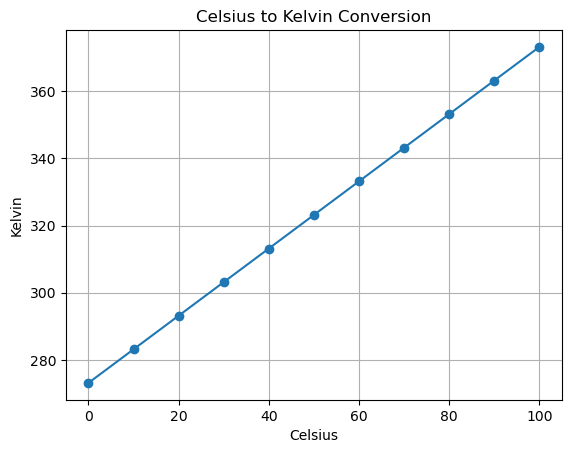

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

c_to_k = lambda c: c + 273.15

data = {"Celsius": list(range(0, 101, 10))}
data["Kelvin"] = list(map(c_to_k, data["Celsius"]))
df = pd.DataFrame(data)

print(df)

plt.plot(df["Celsius"], df["Kelvin"], marker="o")
plt.xlabel("Celsius")
plt.ylabel("Kelvin")
plt.title("Celsius to Kelvin Conversion")
plt.grid()
plt.show()